<p style="text-align:center;font-weight: bold;">  </p>
<p style="text-align:center;font-size:30px;font-weight: bold;">HOW TO CREATE A CUSTOM WORD CLOUD IN PYTHON</p>
<p style="text-align:center;font-weight: bold;">  </p>
<p style="text-align:center;font-size:15px"> By using WordCloud library</p>
<p>  </p>


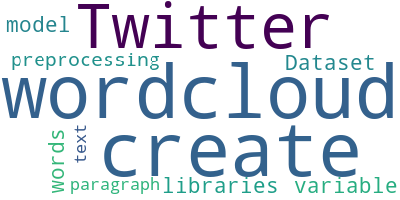

<p style="text-align:justify"> A Word Cloud  or Tag Cloud is a graphical representation of word frequency within a text: the more often a word is used in a text, the bigger and bolder it is represented in a graph. It can be a useful tool to communicate at a glance the most important keywords in a particular text or topic in a effective and fun way. </p>

<p style="text-align:justify"> In this tutorial we will create a Word Cloud from a sample of nameless tweets extracted from Twitter for the period 3/16/2020 - 08/31/2020 in Peru. The dataset was modificated to respect Twitter private information policy and is used just as an example to show how to create a Word Cloud. With this dataset, we will do different examples of Word Clouds by using the following steps: </p>

<ol>
  <li>Install packages and import libraries </li>
  <li>Import the dataset, clean it up and select the text you are going to work with (tweets)</li>
  <li>Perform the text preprocessing and create a clean variable </li>
  <li>Create your Word Cloud:
    <p>  </p>  
      <ul> 
          <li> Example 1: Default model</li>
          <li> Example 2: Default model - customize parameters </li>
          <li> Example 3: Customize shapes </li>
          <li> Example 4: Customize colors - set multiple colors with a mask </li>
          <li> Example 5: Customize colors - set a single color with a mask </li>
          <li> Example 6: Customize colors - set multiple colors with a function</li>
          <li> Example 7: Customize content - set repeated words</li>
          <li> Example 8: Customize content - set non-repeated words </li>
      </ul>
  </li>
  <p>  </p>  
    
   <li>Finally, you can review Bibliography to look for more information</li>   
</ol>



### 1. Install packages and import libraries

<b><u>Install packages</u></b>

First of all, we have to install wordcloud package. To do it, we can try the following options:

In [ ]:
# If you are using pip:
pip install wordcloud
# If you are using conda, you can install from the conda-forge channel:
conda install -c conda-forge wordcloud
# If the previous options do not work to creaate wordclouds, you can try with this:
git clone https://github.com/amueller/word_cloud.git
cd word_cloud
pip install 

Note:
To use Wordcloud you have to install numpy, pandas and pillow packages as prerequisite. To save the wordcloud into a file, you can also install matplotlib.

<b><u>Import libraries </u></b>

Then, we import the all the libraries we are going to use

In [29]:
# libraries for wordcloud

import numpy as np # it is used to handle multi-dimensional arrays and matrices.
import pandas as pd # numpy can be used with pandas to perform data analysis.
from PIL import Image #it enables image reading. You will need this library to read in image as the mask for the wordcloud.
import matplotlib.pyplot as plt # basic library for visualization. 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #wordclouds. You ca use ?WordCloud to explore the library.

# other libraries

import re # A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).
import emoji as emoji # Emoji Module is a Python package that allows us to use and print emojis through a Python program, and we can even use this module to use emojis inside an application we are creating using Python.
import warnings # Supress Warnings 
warnings.filterwarnings("ignore") 
from nltk.corpus import stopwords # Remove stopwords with nltk
import random #random values

### 2. Import the data set, check it out and select the variable you are going to work with (tweets)

<b><u>Import the dataset</u></b>

In [2]:
df = pd.read_csv(r'C:\Users\jilli\Desktop\PROJECTS\WORDCLOUDS\0_DataSet\sampleTweetsPeru.csv')
df.shape # Dimension of the dataframe (df): 53 102 tweets y 11 variables

(53102, 11)

In [3]:
df.head(5) # show heads and the first 5 rows 

Tweet_Id  Tweet_User_Id  Tweet_User  \
0         1              1           1   
1         2              2           2   
2         3              3           3   
3         4              4           4   
4         5              5           5   

                                                Text  Retweets  Favorites  \
0  Si no fuera por la cuarentena, hace ratooooo e...         0          0   
1  Mejor asi acabamos con la Pandemia Fujimorista...         0          4   
2  Yo, cuando coma chifa después de la cuarentena...         3          3   
3  Ala mierda está lluvia está limpiando el coron...         0          1   
4  Hay personas que fueron independientes toda su...         0          0   

   Replies                   Datetime Pais         Tweet_Source lang  
0        0  2020-03-31 23:54:07+00:00  Per  Twitter for Android   es  
1        1  2020-03-31 23:53:42+00:00  Per   Twitter for iPhone   es  
2        0  2020-03-31 23:50:29+00:00  Per   Twitter for iPhone   es  
3        1  2020-03-31 23:49:21+00:00  Per   Twitter for iPhone   es  
4        0  2020-03-31 23:46:17+00:00  Per  Twitter for Android   es

<b><u>Ckeck the dataset </u></b>

In [4]:
df.info() #check the type of each column, nulls, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53102 entries, 0 to 53101
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_Id       53102 non-null  int64 
 1   Tweet_User_Id  53102 non-null  int64 
 2   Tweet_User     53102 non-null  int64 
 3   Text           53102 non-null  object
 4   Retweets       53102 non-null  int64 
 5   Favorites      53102 non-null  int64 
 6   Replies        53102 non-null  int64 
 7   Datetime       53102 non-null  object
 8   Pais           53102 non-null  object
 9   Tweet_Source   53102 non-null  object
 10  lang           53102 non-null  object
dtypes: int64(6), object(5)
memory usage: 4.5+ MB


In [5]:
df.describe() # summary statistics

Tweet_Id  Tweet_User_Id    Tweet_User      Retweets     Favorites  \
count  53102.000000   53102.000000  53102.000000  53102.000000  53102.000000   
mean   26551.500000   26551.500000  26551.500000      3.097454     11.493183   
std    15329.371334   15329.371334  15329.371334     40.659349    138.101112   
min        1.000000       1.000000      1.000000      0.000000      0.000000   
25%    13276.250000   13276.250000  13276.250000      0.000000      0.000000   
50%    26551.500000   26551.500000  26551.500000      0.000000      0.000000   
75%    39826.750000   39826.750000  39826.750000      0.000000      2.000000   
max    53102.000000   53102.000000  53102.000000   5024.000000  16508.000000   

            Replies  
count  53102.000000  
mean       1.570751  
std       19.876393  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max     1859.000000

In [6]:
df.isnull().sum() # another way to check null values
df.isna().sum()  # in the case you can drop nulls, you can use df.dropna(inplace=True)

Tweet_Id         0
Tweet_User_Id    0
Tweet_User       0
Text             0
Retweets         0
Favorites        0
Replies          0
Datetime         0
Pais             0
Tweet_Source     0
lang             0
dtype: int64

In [7]:
df.duplicated() #ckeck for duplicate rows in the dataset

0        False
1        False
2        False
3        False
4        False
         ...  
53097    False
53098    False
53099    False
53100    False
53101    False
Length: 53102, dtype: bool

In [8]:
df['lang'].value_counts() # check that all tweets are in the same language. In this case, all tweets are in spanish.

es    53102
Name: lang, dtype: int64

In [9]:
Tweet_Source = df.groupby("Tweet_Source") # if you want to disaggregate information by any variable, you can use groupby command
Tweet_Source.describe().head()# in this example, you can see that almost all informaation comes from Instagram

Tweet_Id                                                \
                  count          mean           std      min      25%   
Tweet_Source                                                            
Foursquare         19.0  12955.684211  11725.116171   2724.0   6657.0   
Hootsuite Inc.     26.0  35608.846154  11673.582051  16725.0  26792.5   
Instagram        3865.0  28001.978008  16408.869315     12.0  11811.0   
SocialGest          1.0  30060.000000           NaN  30060.0  30060.0   
Squarespace         1.0  42379.000000           NaN  42379.0  42379.0   

                                           Tweet_User_Id                ...  \
                    50%       75%      max         count          mean  ...   
Tweet_Source                                                            ...   
Foursquare      10107.0  13084.00  52599.0          19.0  12955.684211  ...   
Hootsuite Inc.  32214.5  47028.75  52898.0          26.0  35608.846154  ...   
Instagram       29838.0  42478.00  53081.0        3865.0  28001.978008  ...   
SocialGest      30060.0  30060.00  30060.0           1.0  30060.000000  ...   
Squarespace     42379.0  42379.00  42379.0           1.0  42379.000000  ...   

               Favorites       Replies                                     \
                     75%   max   count      mean       std  min  25%  50%   
Tweet_Source                                                                
Foursquare           0.0   2.0    19.0  0.052632  0.229416  0.0  0.0  0.0   
Hootsuite Inc.       0.0   1.0    26.0  0.000000  0.000000  0.0  0.0  0.0   
Instagram            0.0  98.0  3865.0  0.045019  0.313667  0.0  0.0  0.0   
SocialGest           0.0   0.0     1.0  0.000000       NaN  0.0  0.0  0.0   
Squarespace          3.0   3.0     1.0  0.000000       NaN  0.0  0.0  0.0   

                          
                75%  max  
Tweet_Source              
Foursquare      0.0  1.0  
Hootsuite Inc.  0.0  0.0  
Instagram       0.0  8.0  
SocialGest      0.0  0.0  
Squarespace     0.0  0.0  

[5 rows x 48 columns]

<b><u> Select the variable you are going to use for the wordcloud  </u></b>

In this case we are going to use the variable of tweets called in this dataset as "Text"

In [10]:
df.Text[0:5] #show the fisrt 5 rows

0    Si no fuera por la cuarentena, hace ratooooo e...
1    Mejor asi acabamos con la Pandemia Fujimorista...
2    Yo, cuando coma chifa después de la cuarentena...
3    Ala mierda está lluvia está limpiando el coron...
4    Hay personas que fueron independientes toda su...
Name: Text, dtype: object

As you can see, the text is not showed completely. You can use the following option to show the whole text

In [11]:
pd.set_option("display.max_colwidth",None)

In [12]:
df.Text[0:5] # mostrar filas

0                                                                                                                                                                          Si no fuera por la cuarentena, hace ratooooo estuviera caminando bajo la lluvia 💕
1                                                                                                                                                                                          Mejor asi acabamos con la Pandemia Fujimorista >) :)👑👑👑🇵🇪🇵🇪🇵🇪 . 🍔
2                                                                                                                                                                              Yo, cuando coma chifa después de la cuarentena #cuarentena #coronavirusenperu
3                                                                                                                                                                                                   Ala mierda está lluvia está limpiando el coro

In [13]:
df.Text.duplicated().sum() #ckeck for duplicate rows in Text variable

0

In [14]:
duplicateRowsDF = df[df.Text.duplicated()] #show the list of duplicates (if any)
duplicateRowsDF 

Empty DataFrame
Columns: [Tweet_Id, Tweet_User_Id, Tweet_User, Text, Retweets, Favorites, Replies, Datetime, Pais, Tweet_Source, lang]
Index: []

### 3. Perform the text preprocessing and create a clean variable

You can clean and transform the variable "Text" with the goal to get uniform data without noise that can affect the quality of the result. To to this you can copy the "Text" variable into a new one called "clean_text" from which you can make the following changes.

In [15]:
df["clean_text"]=df["Text"] ## add variable "clean_text"

<b><u>Normalization</u></b>

In [16]:
# Normalize variable by using a function

def clean(text):
  
  # Lowercasing
    
    text = text.lower()  
    
  # replacing accents
    
    vowels= [('á','a'), ('é','e'), ('í','i'), ('ó','o'), ('ú','u'), ('ü','u'),('aa','a'), ('ee','e'), ('ii','i'), ('oo','o'), ('uu','u')]
    
    for s,t in vowels:
        text = re.sub(r'{0}'.format(s), t, text, flags=re.IGNORECASE)          
    
  # changing jargons and words

    jargon = [('d','de'), ('[qk]','que'), ('xo','pero'),('fav','favorito'), ('vac','vacaciones'),('xa', 'para'), ('ala', 'asombro'),('[xp]q','porque'),('es[qk]', 'es que'),
             ('fvr','favor'),('(xfa|xf|pf|plis|pls|porfa)', 'por favor'), ('dnd','donde'), ('tb', 'también'),('ud','usted'),
             ('uds','ustedes'),('sr','señor'),('(fds|finde)','fin de semana'),('app','aplicación'),
             ('(ctm|alv|hdp|csm|La concha de tu madre|conchasumadres|reconchadesumadre|conchatumadre|la concha de la madre|la concha de su madre|La concha bien de su madre|la concha de tu hermana|concha madre|mierda|carajo|crjo)','insulto'),
             ('(tq|tk)', 'te quiero'), ('(tqm|tkm)', 'te quiero mucho'),('bb','bebé'), ('x','por'),('\+','mas'), 
             ('(coronavirus|Coronavirus19|covid|covid1919|covid_19|covid19|covid-19|covid__19|covid_)','coronavirus'),('covid_19peru','coronavirus peru')]
    
    for s,t in jargon:
        text = re.sub(r'\b{0}\b'.format(s), t, text, flags=re.IGNORECASE)
        

  # more cleaning
    
    text = re.sub(r'https?://\S+','',text) #normalize URLs - look for https and replace for ""
    text = re.sub(r'www.\S+','',text) #normalize WWW
    text = re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji
    text = re.sub(r'@\S+','',text) #remove user 
                                   # \S cualquier car´acter salvo un espacio en blanco
                                   # + car´acter previo 1 o m´as veces
                                   # inicia con @
    text = re.sub(r'#\S+','',text) #normalize hashtags    
    text = re.sub(r'– at.+$','',text) #remove_at
    text = re.sub(r'\b(?=\w*[j])[aeiouj]{4,}|(juas+|lol+)|(ja|jaa)\b', 'risas', text, flags=re.IGNORECASE) #normalize laughs - replace jajaja jiji for risas
                                          # \b cadena vac´ıa
                                          # \w caracter alfanum´erico o gui´on bajo
    text = re.sub(r'[^\w\s]','',text) # extract not alphanumeric character, space or __
                                      ### por ejemmplo quita  ( ?
                                      #\s espacio en blanco  
                                      #\w ar´acter alfanum´erico o gui´on bajo
                                      # ^  ˆal inicio de un [] significa negaci´on
    text = re.sub(r'(.)\1{2,}', r'\1\1', text, flags=re.IGNORECASE) #normalize repetitions: noooooo to noo   
    text = re.sub('\d+', '', text) #remove_digits
                                   # \d  digito # + car´acter previo 1 o m´as veces
    text = text.replace("ー"," ")     # remove ー
    text = text.replace("_","")     # remove _
    #text = re.sub("ー-", "", text)
    text = re.sub(r'\b\w{1,2}\b','',text) # remove alphanumeric character or _ from 1 to 2 letters
                                        # \b cadena vac´ıa
                                        # \w caracter alfanum´erico o gui´on bajo
                                        # {1,2}  {m,n} busca la coincidencia de la expresi´on anterior de m a n veces, tomando tantas repeticiones como sea posible.
    text = re.sub(r' +',' ',text) #change extra whitespaces  to one whitespace
    text = text.strip()   #removes whitespaces from the start and end of the string

    return text 



In [17]:
df['clean_text']=df['Text'].apply(lambda tweet: clean(tweet)) #aaply clean function

In [18]:
df[["Text","clean_text"]].head()

Text  \
0                                                                                                                                                                        Si no fuera por la cuarentena, hace ratooooo estuviera caminando bajo la lluvia 💕   
1                                                                                                                                                                                        Mejor asi acabamos con la Pandemia Fujimorista >) :)👑👑👑🇵🇪🇵🇪🇵🇪 . 🍔   
2                                                                                                                                                                            Yo, cuando coma chifa después de la cuarentena #cuarentena #coronavirusenperu   
3                                                                                                                                                                                                 Ala mierda está lluvia está limpiando el coronavirus (?)   
4  Hay personas que fueron independientes toda su vida, no estan en ningun programa de bono o auxilio, ahora en cuarentena. Sin dinero, sin asistencia, mayores de 60 años sin poder producir, se mueren de hambre Se hará algún programa que los ayuden?    

                                                                                                                                                                                                        clean_text  
0                                                                                                                                                  fuera por cuarentena hace ratoo estuviera caminando bajo lluvia  
1                                                                                                                                                                      mejor asi acabamos con pandemia fujimorista  
2                                                                                                                                                                             cuando coma chifa despues cuarentena  
3                                                                                                                                                           asombro insulto esta lluvia esta limpiando coronavirus  
4  hay personas que fueron independientes toda vida estan ningun programa bono auxilio ahora cuarentena sin dinero sin asistencia mayores años sin poder producir mueren hambre hara algun programa que los ayuden

<b><u> Stopword removal and Tokenization</u></b>

In [19]:
# you can remove stopwords an tokenize each text into words by using split function. You separate each word by a space to get tokens that can be usefull for future analysis 

spanish_stopwords = stopwords.words('spanish')   ##para quitar las stopwords
spanish_stopwords.extend(['así','tambien','ahi','decir','asi','ir','voy','fui','ire','ud','mierda','ademas','etc','además','pueden','dos','mese','cosa','gran','tan','puede','vez','creo','deben','dia','viru','vo','acá','dice','xq','mese','what','aún','día','hizo','debe','sigue','mismo','pasa','vo','fa','luego','alguien','cada','sino','','User','ma','aquí','mientras','vamo','ahí','sabe','sido','tener','meno','mientra','pue','pues','da','hacen','van','después','tbt','URL','va','mts','x','día','ser','ver','hace','hoy''ahora','hara','algun','solo','toda','at','q','juncal','mas','nunca','cómo','si','sí','hacer','hoy','sólo','estan','solamente','dias','dia','aqui','aca','alla','alli','despues'])

df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords)]))

In [20]:
df[["Text","clean_text"]].head() #compare the original text with the clen text

Text  \
0                                                                                                                                                                        Si no fuera por la cuarentena, hace ratooooo estuviera caminando bajo la lluvia 💕   
1                                                                                                                                                                                        Mejor asi acabamos con la Pandemia Fujimorista >) :)👑👑👑🇵🇪🇵🇪🇵🇪 . 🍔   
2                                                                                                                                                                            Yo, cuando coma chifa después de la cuarentena #cuarentena #coronavirusenperu   
3                                                                                                                                                                                                 Ala mierda está lluvia está limpiando el coronavirus (?)   
4  Hay personas que fueron independientes toda su vida, no estan en ningun programa de bono o auxilio, ahora en cuarentena. Sin dinero, sin asistencia, mayores de 60 años sin poder producir, se mueren de hambre Se hará algún programa que los ayuden?    

                                                                                                                                               clean_text  
0                                                                                                                  cuarentena ratoo caminando bajo lluvia  
1                                                                                                                     mejor acabamos pandemia fujimorista  
2                                                                                                                                   coma chifa cuarentena  
3                                                                                                            asombro insulto lluvia limpiando coronavirus  
4  personas independientes vida ningun programa bono auxilio ahora cuarentena dinero asistencia mayores años poder producir mueren hambre programa ayuden

### 4. Create your Word Cloud

In [21]:
# number of words
words = " ".join(review for review in df.clean_text)
print ("There are {} words in the combination of all review.".format(len(words)))

There are 4910205 words in the combination of all review.


In [22]:
words

'cuarentena ratoo caminando bajo lluvia mejor acabamos pandemia fujimorista coma chifa cuarentena asombro insulto lluvia limpiando coronavirus personas independientes vida ningun programa bono auxilio ahora cuarentena dinero asistencia mayores años poder producir mueren hambre programa ayuden llueve chico acuerda lluvia acida coronavirus ahora apoyo clima lloviendo sjm lima peru faltan cosas compensan respecto supuesto documento interno circula redes sociales fallecimiento tres efectivos aclara deceso debio causas distintas coronavirus caso realizo prueba arrojo positivo lluvia cuarentena aparecio arco iris comenzar toque queda ojala arco iris signo cosas mejoraran san juan miraflores hamburguesas pan ciabatta foto keyleaguilar termina largo ica meses insulto cuarentena maravilla musa atrapada gimiendo laberinto jardin frances mariposa busqueda ltorres cuarentena aburrido lanzas locutor cuñada encima cuarentena doble chamba insulto plaza acho demolida pase pandemia cuarentena aguante o

<b><u>Example 1: Default model</u></b>


Generating a square wordcloud using default arguments. Note that the word "coronavirus" is changed to "coroanviru". It happens because the default setting change words in plural to singular.

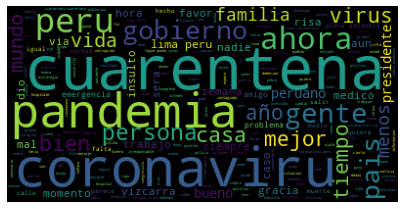

In [25]:
## Create and generate a word cloud image
wc = WordCloud().generate(words)

# save the image
wc.to_file("C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example1/Example1.png")

# Display the generated image
plt.figure(figsize=[7,7])
plt.imshow(wc)
plt.axis("off")
plt.show()

In [26]:
## Create and generate a word cloud image

wc = WordCloud().generate(words)

# The pil way (if you don't have matplotlib)
image = wc.to_image()
image.show()

<b><u>Example 2: Default model - Customize parameters</u></b>

As you can see in the following example, you can change the default setting: number or words, plural/singular words,  background color, etc.

<Figure size 432x288 with 0 Axes>

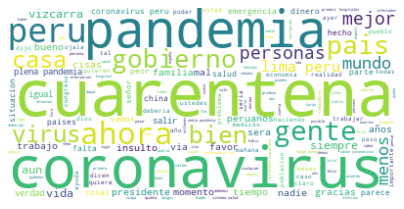

In [180]:
# Create and generate a word cloud image. Change some paramentes
wc = WordCloud(max_font_size=90, max_words=1000,normalize_plurals=False, background_color="white").generate(words)

# save the image
wc.to_file("C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example2/Example2.png")

# Display the generated image
plt.figure()
plt.figure(figsize=[7,7])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

<b><u>Example 3: Customize shapes </u></b>   

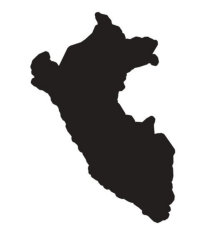

In [30]:
# Charge a black and white image that you will use as a mask 
mask = np.array(Image.open('C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example3/Figure3.jpg'));
plt.axis("off")
plt.imshow(mask)

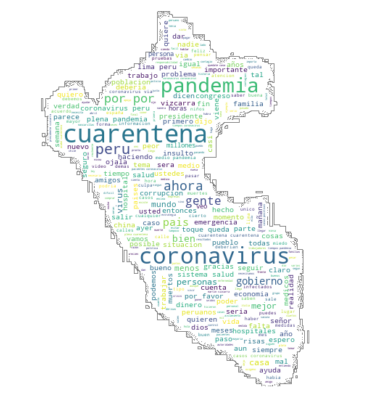

In [228]:
# Create and generate a word cloud image 
wc = WordCloud(background_color="white", max_words=1000, normalize_plurals=False, mask=mask, contour_width=0.001, contour_color='gray')
wc.generate(words)

# Display the generated image
plt.figure(figsize=[10,7])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image
wc.to_file("C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example3/Example3.png")

<b><u> Example 4: Customize colors - set multiple colors with a mask</u></b>      

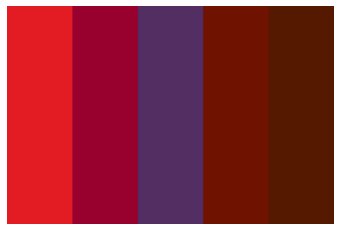

In [224]:
# Charge the colored image that you will use as a mask
mask = np.array(Image.open("C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example4/Figure4.png"))
plt.axis("off")
plt.imshow(mask)

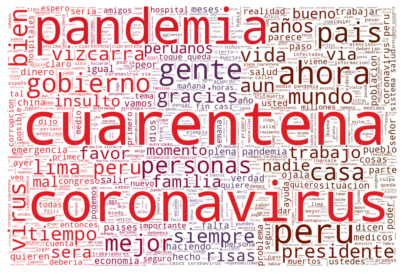

In [226]:
# Add addional stopwords (if you find out an extra word you want to eliminate)
stopwords = set(STOPWORDS)
stopwords.update(["caso","menos","por"])

# Create and generate a word cloud image
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=1000,normalize_plurals=False, mask=mask).generate(words)
image_colors = ImageColorGenerator(mask)

# Display the generated image
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image
wc.to_file("C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example4/Example4.png")

<b><u>Example 5: Customize colors - set a single color with a mask </u></b>      

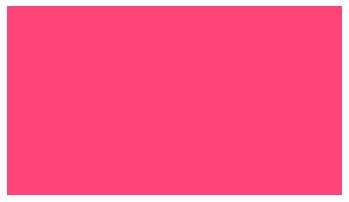

In [220]:
mask = np.array(Image.open("C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example5/Figure5.png"))
plt.axis("off")
plt.imshow(mask)

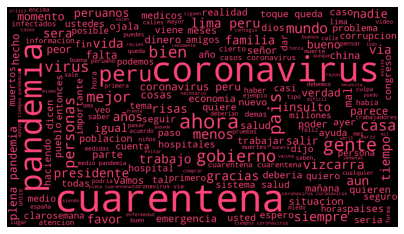

In [291]:
# Create and generate a word cloud image
wc = WordCloud(background_color="black", normalize_plurals=False, mask=mask).generate(words)
image_colors = ImageColorGenerator(mask)

# Display the generated image
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

# Save the image
wc.to_file("C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example5/Example5.png")

<b><u>Example 6: Customize colors - set multiple colors with a function</u></b>      

 By using a function you can display a color for each word. You can change the colors by changing hsl (hue, saturation, luminance). For example,  
- (282, 53%%, %d%%) purple
- (0, 100%%, %d%%) red
- (0, 0%%, %d%%) grey
- (240, 100%%, %d%%)" blue
- (147, 50%%, %d%%) green
- (39, 100%%, %d%%) yellow

For more information to set colors, visit  https://www.w3schools.com/html/html_colors_hsl.asp

You can use random values between 0 and whatever value you think is appropriately "dark" enough to play with the scale of colors

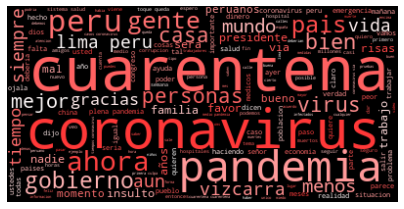

In [23]:
def color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(60, 100)

# Create and generate a word cloud image
wc = WordCloud(background_color="black",  normalize_plurals=False).generate(words)

# Display the generated image
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image
wc.to_file("C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example6/Example6.png")


<b><u>Example 7: Customize content - set repeated words </u></b>      

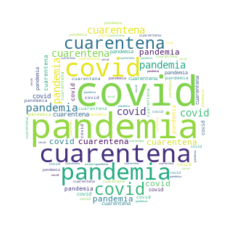

In [302]:
my_list=["covid", "pandemia", "cuarentena"]
my_words1 = " ".join(review for review in my_list)

import matplotlib.pyplot as plt

# if you can set a circular shape just the following mask

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask) #en forma circular
wc.generate(my_words1)

# if you can set a rectangular just not use the mask

    # wc = WordCloud(background_color="white",repeat=True).generate(words) 
    # wc.generate(words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Save the image
wc.to_file("C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example7/Example7.png")


<b><u>Example 8: Customize content - set non-repeated words </u></b>      

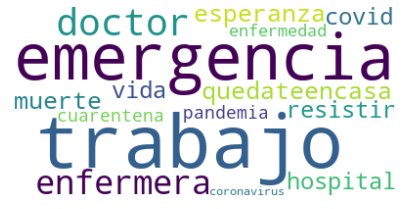

In [306]:
my_list=["trabajo","emergencia","doctor","enfermera","quedateencasa","muerte","esperanza","hospital","resistir","vida","covid", "pandemia", "cuarentena","enfermedad","coronavirus"]
my_words2 = " ".join(review for review in my_list)

## Create and generate a word cloud image:
wc = WordCloud(background_color="white").generate(my_words2)
#wordcloud = WordCloud(background_color="white",max_font_size=20, min_font_size=11,height= 100,width=300).generate(my_words)# same size letter
# Display the generated image:
plt.figure(figsize=[7,7])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image
wc.to_file("C:/Users/jilli/Desktop/PROJECTS/WORDCLOUDS/2_Examples/Example8/Example8.png")


### 5. Review Bibliography

You can get more information in the following source:

https://amueller.github.io/word_cloud/

or type ?WordCloud to get more information about parameters, attibutes, etc.

In [3]:
?WordCloud